# Blood donations prediction

### https://www.drivendata.org/competitions/2/warm-up-predict-blood-donations/

#### Predict if the donator will donate in March 2007

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
training_data = pd.read_csv('../data/BloodDonation_Train.csv')
testing_data = pd.read_csv('../data/BloodDonation_Test.csv')

In [61]:
# training_data.info()
training_data.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [59]:
training_data.drop(['Unnamed: 0','Made Donation in March 2007'], axis = 1).describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


In [62]:
### check the number of data which shows made donation in March 2007
training_data['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

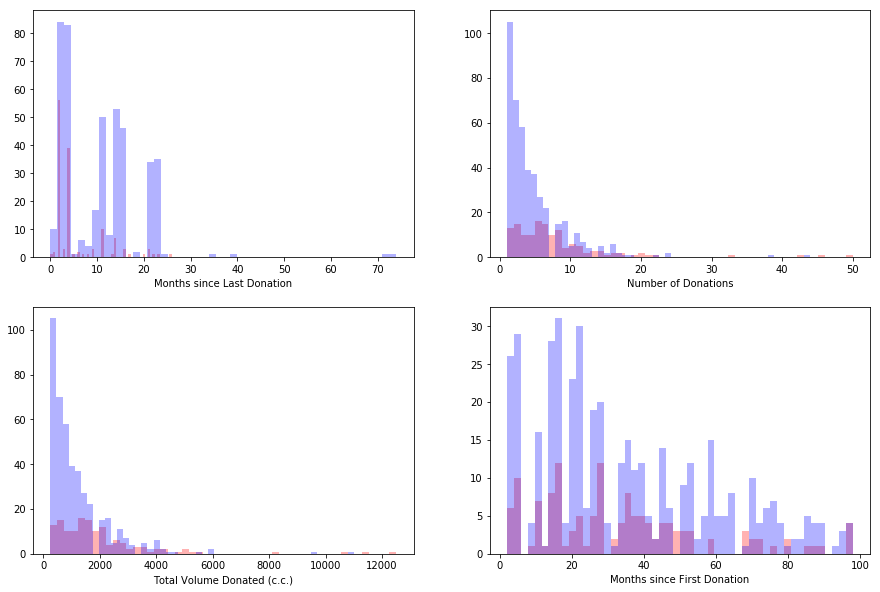

In [66]:
fig, ax = plt.subplots(2,2, figsize = (15,10))
# plt.figure(figsize = (8,5))

feature = training_data.drop(['Unnamed: 0','Made Donation in March 2007'], axis = 1).columns

for i in range(2):
    for j in range(2):
        index = i*2 + j
        ax[i, j].hist(training_data[training_data['Made Donation in March 2007'] == 1][feature[index]], bins = 50, color = 'red', alpha = 0.3)
        ax[i, j].hist(training_data[training_data['Made Donation in March 2007'] == 0][feature[index]], bins = 50, color = 'blue', alpha = 0.3)
        ax[i, j].set_xlabel(feature[index])


#### 大致上總捐血量呈現右偏的狀態

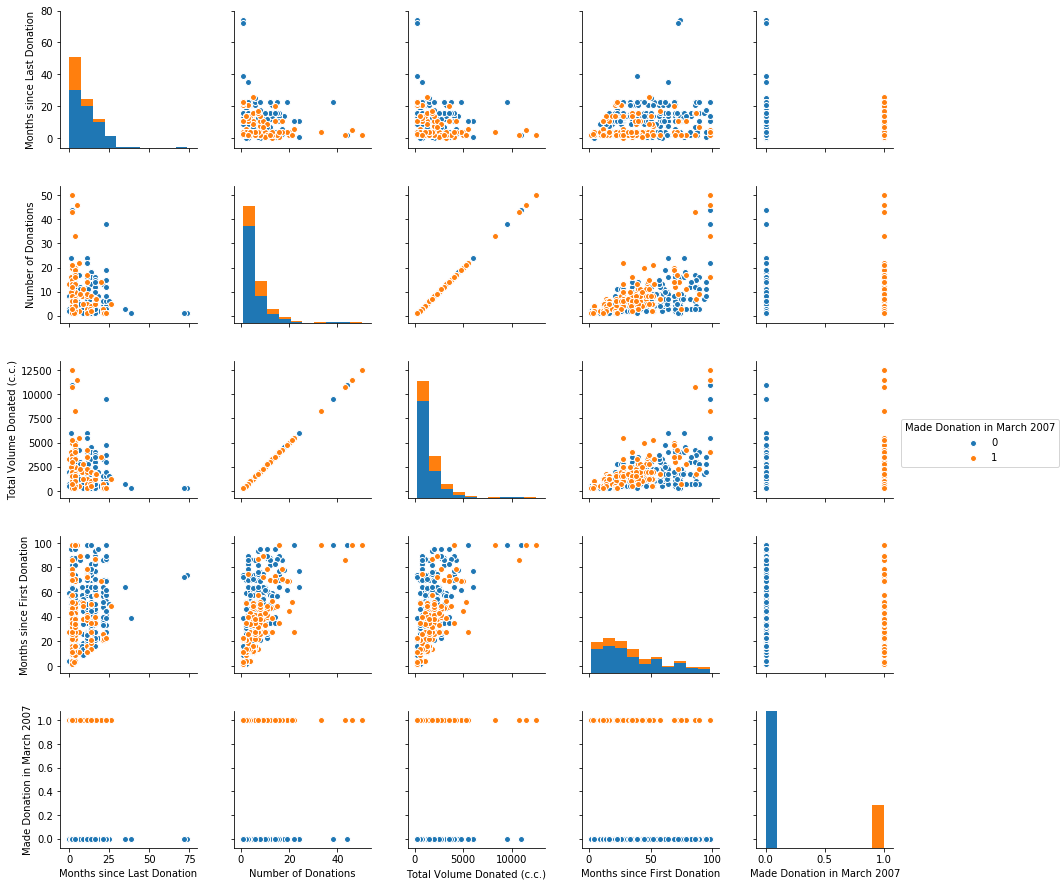

In [68]:
"""EDA"""
sns.pairplot(training_data.drop(['Unnamed: 0'], axis = 1), hue = 'Made Donation in March 2007')
## accriding to the pairplot, except the feature "total Volumne Donated" and the "Number of donations" has a highly correlation,
## which is obvious, the more times you donated the more volumns you donated, so I'll eliminate one.

In [320]:
from sklearn.preprocessing import scale
def clean_data(data, train_flag = True):
    new_data = data.copy()
    new_data.drop(['Unnamed: 0','Total Volume Donated (c.c.)'], axis = 1, inplace = True)
    X = scale(new_data.drop(['Made Donation in March 2007'], axis = 1))
    X = pd.DataFrame(X, columns=['Months since Last Donation', 'Number of Donations', 'Months since First Donation'])
    if train_flag:
        y = new_data['Made Donation in March 2007']
        return X, y
    else:
        return X

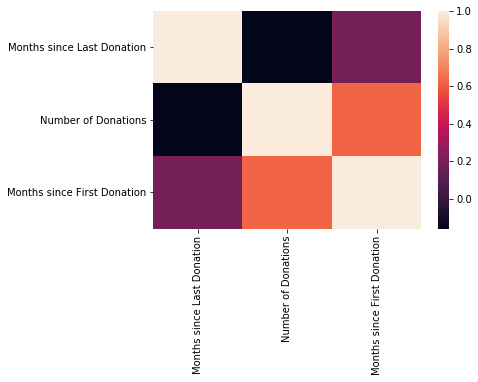

In [323]:
X, y = clean_data(training_data)
sns.heatmap(X.corr())

____
#### use a simple logistic regressor and see if this doing well
____

In [324]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [372]:
X, y = clean_data(training_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('number of training data: ',len(X_train))
print('number of testing data: ', len(X_test))
X.info()

number of training data:  460
number of testing data:  116
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 3 columns):
Months since Last Donation     576 non-null float64
Number of Donations            576 non-null float64
Months since First Donation    576 non-null float64
dtypes: float64(3)
memory usage: 13.6 KB


In [373]:
logits_model = LogisticRegression()
logits_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [374]:
logits_predict = logits_model.predict(X_test)
print(classification_report(y_test, logits_predict))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86        87
          1       1.00      0.03      0.07        29

avg / total       0.82      0.76      0.66       116



____
#### SVM
____

In [375]:
from sklearn.svm import SVC

In [376]:
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [377]:
predict_svc = svc.predict(X_test)
print(classification_report(y_test, predict_svc))

             precision    recall  f1-score   support

          0       0.76      1.00      0.86        87
          1       1.00      0.03      0.07        29

avg / total       0.82      0.76      0.66       116



____
#### Trees
____

In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [332]:
random_tree = RandomForestClassifier()
random_tree.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [333]:
predict_rtree = random_tree.predict(X_test)
print(classification_report(y_test, predict_rtree))

             precision    recall  f1-score   support

          0       0.81      0.84      0.82        87
          1       0.46      0.41      0.44        29

avg / total       0.72      0.73      0.73       116



In [366]:
decision_tree = DecisionTreeClassifier(max_depth=3) ### depth is better at 3
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [367]:
predict_dtree = decision_tree.predict(X_test)
print(classification_report(y_test, predict_dtree))

             precision    recall  f1-score   support

          0       0.53      0.73      0.62        11
          1       0.77      0.59      0.67        17

avg / total       0.68      0.64      0.65        28



In [336]:
##### Decisiontree with Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3))
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [337]:
ada_predict = ada_model.predict(X_test)
print(classification_report(y_test, ada_predict))

             precision    recall  f1-score   support

          0       0.82      0.86      0.84        87
          1       0.50      0.41      0.45        29

avg / total       0.74      0.75      0.74       116



____
#### GB and XGB
____

In [338]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [343]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [344]:
xgb_predict = xgb_model.predict(X_test)
print(classification_report(y_test, xgb_predict))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89        87
          1       0.74      0.48      0.58        29

avg / total       0.82      0.83      0.81       116



In [345]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [346]:
gb_predict = gb_model.predict(X_test)
print(classification_report(y_test, gb_predict))

             precision    recall  f1-score   support

          0       0.81      0.86      0.83        87
          1       0.48      0.38      0.42        29

avg / total       0.72      0.74      0.73       116



#### 有鑒於上面的各個模型針對"1"類別，也就是實際在三月時有回去捐血的類別並沒有辦法準確預測，可能是類別資料不平衡的關係，因此擬嘗試使用over-sampling or under-sampling處理資料。

In [347]:
### under-sampling
training_data_0 = training_data[training_data['Made Donation in March 2007'] == 0]
training_data_1 = training_data[training_data['Made Donation in March 2007'] == 1]
print(len(training_data_0), len(training_data_1))

438 138


In [348]:
training_data_0 = training_data_0.sample(138)  ### downsample to 138 data
train_data_undersample = pd.concat([training_data_0,training_data_1])

In [349]:
X, y = clean_data(train_data_undersample)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [350]:
print('number of training data: ',len(X_train))
print('number of testing data: ', len(X_test))

number of training data:  248
number of testing data:  28


In [351]:
#### evaluation of all the model
from sklearn.ensemble import VotingClassifier
svc_under = SVC()
decisiontree_under = DecisionTreeClassifier(max_depth=3)
xgb_under = XGBClassifier()
voting_under = VotingClassifier(estimators=[('svc', svc_under), ('dt', decisiontree_under), ('xgb', xgb_under)])

for model in [svc_under, decisiontree_under, xgb_under, voting_under]:
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    print(model.__class__.__name__)
    print(classification_report(y_test, predict))
    print('########################')
    
#### 從under-sampling 結果來看，類別“1"的recall有明顯提升，而平均準確率約在六成左右，接下來試試看stacking

SVC
             precision    recall  f1-score   support

          0       0.67      0.73      0.70        11
          1       0.81      0.76      0.79        17

avg / total       0.76      0.75      0.75        28

########################
DecisionTreeClassifier
             precision    recall  f1-score   support

          0       0.53      0.73      0.62        11
          1       0.77      0.59      0.67        17

avg / total       0.68      0.64      0.65        28

########################
XGBClassifier
             precision    recall  f1-score   support

          0       0.60      0.82      0.69        11
          1       0.85      0.65      0.73        17

avg / total       0.75      0.71      0.72        28

########################
VotingClassifier
             precision    recall  f1-score   support

          0       0.60      0.82      0.69        11
          1       0.85      0.65      0.73        17

avg / total       0.75      0.71      0.72        28

#######

### Stacking

In [352]:
class one_layer_stacking_model():
    """
    input the models as s list "[svm, xgb, logistic]"
    """
    def __init__(self, models, blender):
        assert len(models) > 0, "at least give one model"
        self.models = {}
        print("models selected to do stacking: ")
        for m in models:
            self.models[m.__class__.__name__] = m
            print(m.__class__.__name__)
        self.blender = blender
        print("blender model: ")
        print(self.blender.__class__.__name__)
        
    def fit(self, X, y):
        blender_input = []  ### use to store prediction for every models
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        for m in self.models:
            self.models[m].fit(X_train, y_train)
            blender_input.append(self.models[m].predict(X_test))
        blender_input = np.asarray(blender_input).reshape(len(X_test),3)
#         return blender_input
        self.blender.fit(blender_input, np.asarray(y_test))
        
    def predict(self, X):
        blender_input = []
        for m in self.models:
            blender_input.append(self.models[m].predict(X))
        blender_input = np.asarray(blender_input).reshape(len(X),3)
        return self.blender.predict(blender_input)

In [353]:
svc_stacking = SVC()
decisiontree_stacking = DecisionTreeClassifier()
randomforest_stacking = RandomForestClassifier()
xgb_stacking = XGBClassifier()

voting_stacking = VotingClassifier(estimators=[('svc', svc_under), ('dt', decisiontree_under), ('xgb', xgb_under)])

one_layer_model = one_layer_stacking_model([svc_stacking, decisiontree_stacking, randomforest_stacking], xgb_stacking)

models selected to do stacking: 
SVC
DecisionTreeClassifier
RandomForestClassifier
blender model: 
XGBClassifier


In [354]:
one_layer_model.fit(X_train, y_train)

In [355]:
one_layer_model_predict = one_layer_model.predict(X_test)
print(classification_report(y_test, one_layer_model_predict))

             precision    recall  f1-score   support

          0       0.41      0.82      0.55        11
          1       0.67      0.24      0.35        17

avg / total       0.57      0.46      0.43        28



#### 經過這麼多模型的測試，準確率都沒有辦法顯著提升，因此很可能是ＥＤＡ做的不夠，亦或者是沒有辦法找到較佳的參數組合。因此接下來在針對這兩者再著墨。

In [298]:
testing_data_clean = testing_data.drop(['Total Volume Donated (c.c.)', 'Unnamed: 0'], axis = 1)
testing_data_clean.head()

,Months since Last Donation,Number of Donations,Months since First Donation
0,2,12,52
1,21,7,38
2,4,1,4
3,11,11,38
4,4,12,34


In [370]:
def testing_predict(model, name, data):
    prediction = model.predict(data)
    submit_df = pd.DataFrame({'No.': testing_data['Unnamed: 0'].values, 'Made Donation in March 2007': prediction})
    submit_df = submit_df[['No.', 'Made Donation in March 2007']]
    submit_df['Made Donation in March 2007'] = submit_df['Made Donation in March 2007'].astype(np.float64)
    submit_df.to_csv('{}.csv'.format(name), index = False)
    print('prediction saved: {}'.format(name))

In [379]:
testing_predict(xgb_model, 'submit_xgb_3_no_under_sample', testing_data_clean)

prediction saved: submit_xgb_3_no_under_sample


### not yet finish..

#### Try Gridsearch

In [380]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
RandomizedSearchCV()